In [1]:
library(SCORPIUS)

In [3]:
cluster2 <- read.delim("/home/spuccio/data/cluster2.csv", row.names=1)
cluster2_meta <- read.delim("/home/spuccio/data//cluster2_meta.csv", header=FALSE)

In [32]:
tf <- read.delim("/home/spuccio/data/hg38_tf.txt", header=FALSE)

In [9]:
space <- reduce_dimensionality(as.matrix(cluster2), "spearman", ndim = 3)

Warning message in RColorBrewer::brewer.pal(num_progressions, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


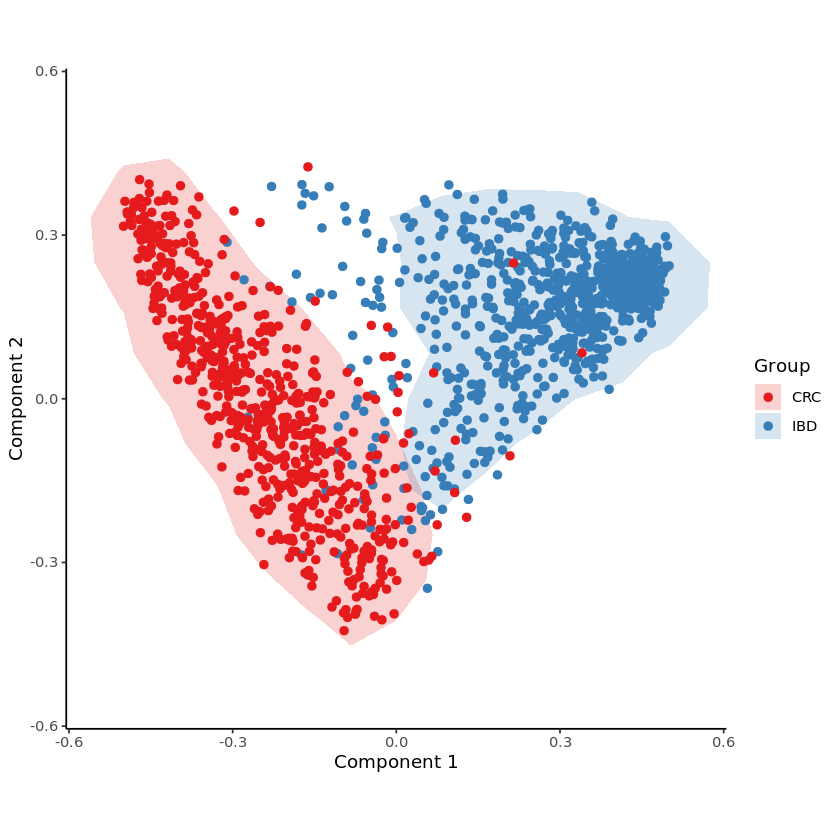

In [16]:
draw_trajectory_plot(space, progression_group = as.factor(cluster2_meta$V2), contour = TRUE)

In [17]:
traj <- infer_trajectory(space)

In [19]:
gimp <- gene_importances(as.matrix(cluster2), traj$time, num_permutations = 0, num_threads = 8)

Growing trees.. Progress: 23%. Estimated remaining time: 1 minute, 42 seconds.
Growing trees.. Progress: 47%. Estimated remaining time: 1 minute, 10 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 39 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 8 seconds.


In [20]:
gene_sel <- gimp[1:50,]

In [65]:
#tf[1:100,]

In [66]:
#expr_sel <- as.matrix(cluster2)[,tf$V1]

In [92]:
#options(repr.plot.width=12, repr.plot.height=11)
#draw_trajectory_heatmap(expr_sel, traj$time, as.factor(cluster2_meta$V2))

In [45]:
newDF<-  as.data.frame(cluster2)[ ,which((names( as.data.frame(cluster2)) %in% tf$V1)==TRUE)]

In [50]:
newDF2 <- newDF[, colSums(newDF != 0) > 0]

In [53]:
#newDF2[1:50,]

In [68]:
#options(repr.plot.width=12, repr.plot.height=11)
#draw_trajectory_heatmap(newDF2, traj$time, as.factor(cluster2_meta$V2))

In [87]:
#modules <- extract_modules(scale_quantile(newDF2), traj$time, verbose = FALSE)
#options(repr.plot.width=22, repr.plot.height=21)
#draw_trajectory_heatmap(newDF2, traj$time, as.factor(cluster2_meta$V2), modules,show_labels_row = TRUE)

In [101]:
gimp <- gene_importances(newDF2, traj$time, num_permutations = 0, ntree = 1000,mtry = ncol(newDF2) * 0.01)
gene_sel2 <- gimp[1:100,]
expr_sel2 <- newDF2[,gene_sel2$gene]
modules2 <- extract_modules(scale_quantile(expr_sel2))

Warning message in RColorBrewer::brewer.pal(num_progressions, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


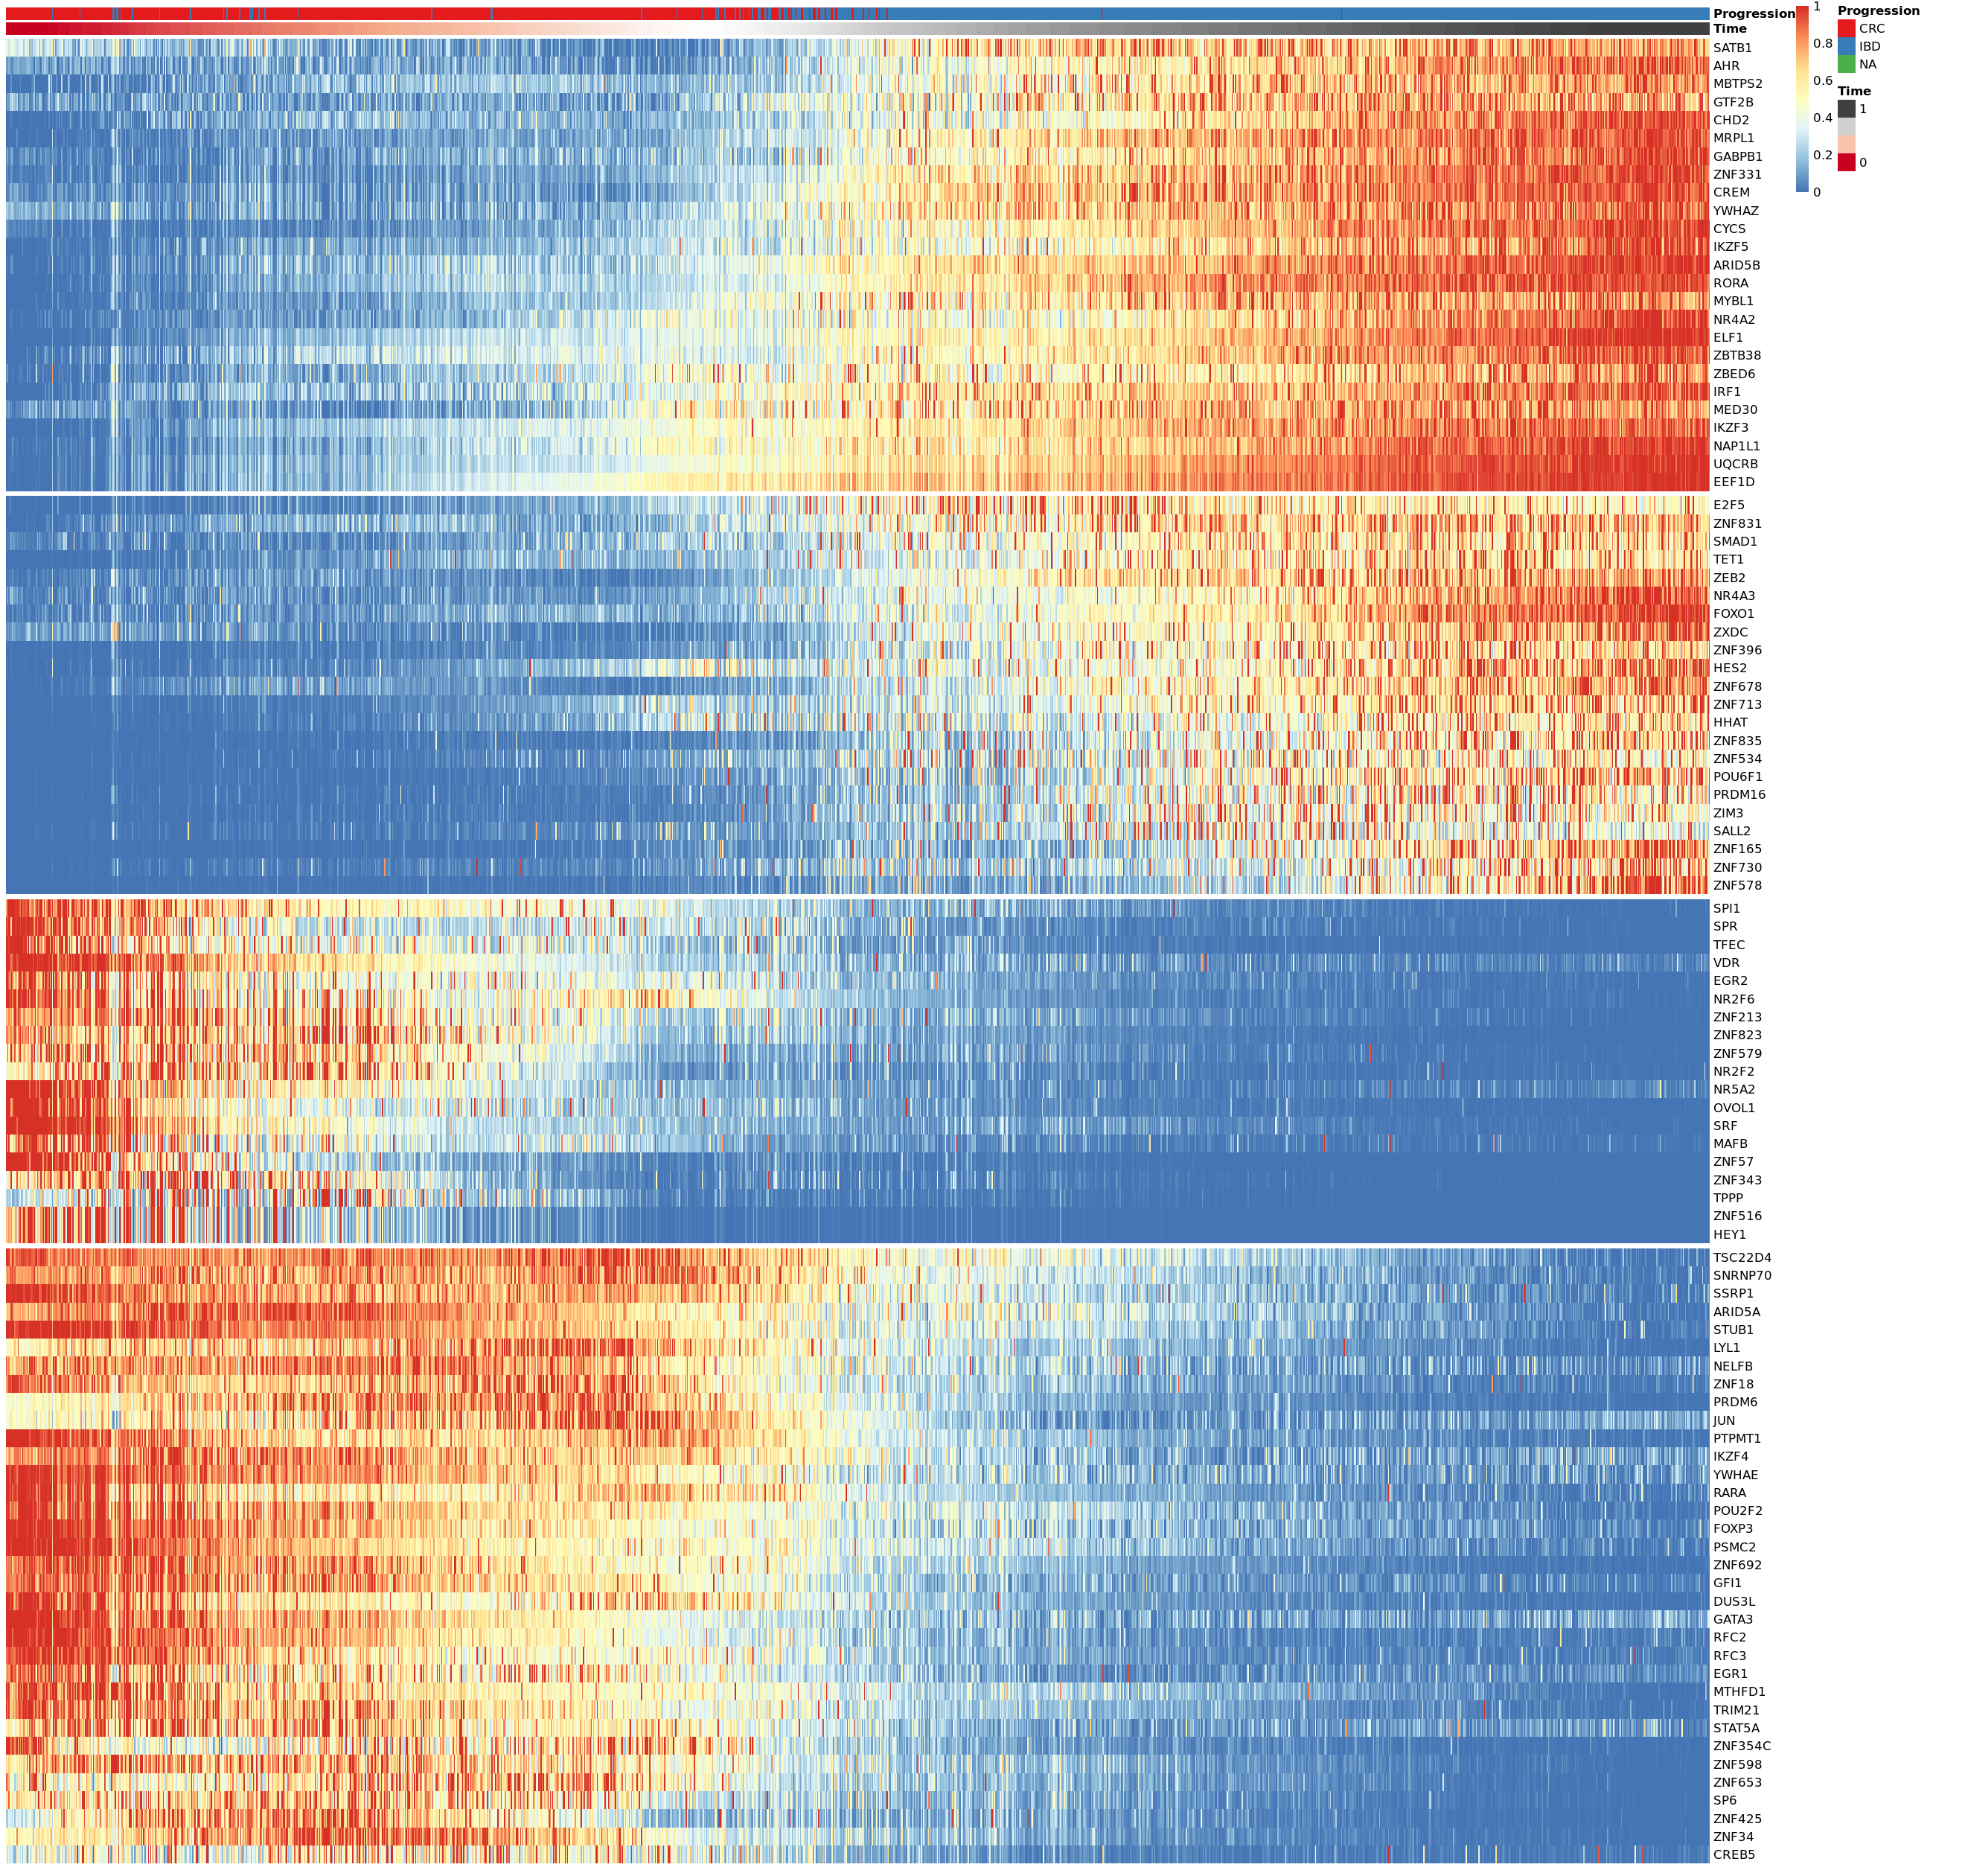

In [105]:
draw_trajectory_heatmap(expr_sel2, traj$time, as.factor(cluster2_meta$V2), modules2,show_labels_row = TRUE)

In [106]:
write.csv(modules2,"/home/spuccio/data/modules.txt",row.names = F)